In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/sample_data/mission7.csv")

In [3]:
data.head()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,Clay,11,10,30,6.1,Lily,Yes
1,Sandy,11,28,26,7.0,Fern,No
2,Clay,6,9,25,5.7,Cactus,Yes
3,Clay,4,24,17,5.5,Fern,Yes
4,Sandy,11,6,20,7.1,Rose,No


In [ ]:
data.duplicated().sum()

900

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Soil Type                   1000 non-null   object 
 1   Sunlight (hours/day)        1000 non-null   int64  
 2   Water Supply (liters/week)  1000 non-null   int64  
 3   Temperature (Â°C)           1000 non-null   int64  
 4   pH Level                    1000 non-null   float64
 5   Plant Species               1000 non-null   object 
 6   Thrives                     1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
data.columns

Index(['Soil Type', 'Sunlight (hours/day)', 'Water Supply (liters/week)',
       'Temperature (Â°C)', 'pH Level', 'Plant Species', 'Thrives'],
      dtype='object')

In [7]:
data['Thrives'] = data['Thrives'].map({"Yes":1, "No": 0})

In [8]:
encode_cols = ['Soil Type', 'Plant Species']

In [9]:
le = {}
for col in encode_cols:
  le[col] = LabelEncoder()
  data[col] = le[col].fit_transform(data[col])

In [10]:
le

{'Soil Type': LabelEncoder(), 'Plant Species': LabelEncoder()}

In [11]:
data.head()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,0,11,10,30,6.1,2,1
1,2,11,28,26,7.0,1,0
2,0,6,9,25,5.7,0,1
3,0,4,24,17,5.5,1,1
4,2,11,6,20,7.1,4,0


In [12]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['Sunlight (hours/day)', 'Water Supply (liters/week)',
       'Temperature (Â°C)', 'pH Level',]
scaler = StandardScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [13]:
data.head()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,0,1.146992,-0.826136,1.463304,-0.683192,2,1
1,2,1.146992,1.403317,0.654178,0.480238,1,0
2,0,-0.710184,-0.949995,0.451897,-1.200272,0,1
3,0,-1.453055,0.907883,-1.166355,-1.458812,1,1
4,2,1.146992,-1.321570,-0.559511,0.609508,4,0


In [14]:
data.describe()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
count,1000.00000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.00000
mean,1.03200,3.730349e-17,-2.202682e-16,3.517187e-16,1.563194e-16,2.000000,0.50000
std,0.79976,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.384889,0.50025
min,0.00000,-1.453055e+00,-1.445429e+00,-1.570918e+00,-1.458812e+00,0.000000,0.00000
25%,0.00000,-7.101844e-01,-9.499947e-01,-7.617920e-01,-8.124620e-01,1.000000,0.00000
50%,1.00000,3.268631e-02,1.647318e-01,4.733387e-02,-3.684195e-02,2.000000,0.50000
75%,2.00000,7.755570e-01,9.078828e-01,8.564598e-01,8.680481e-01,3.000000,1.00000
max,2.00000,1.518428e+00,1.651034e+00,1.463304e+00,1.772938e+00,4.000000,1.00000


Text(0, 0.5, 'Frequecy')

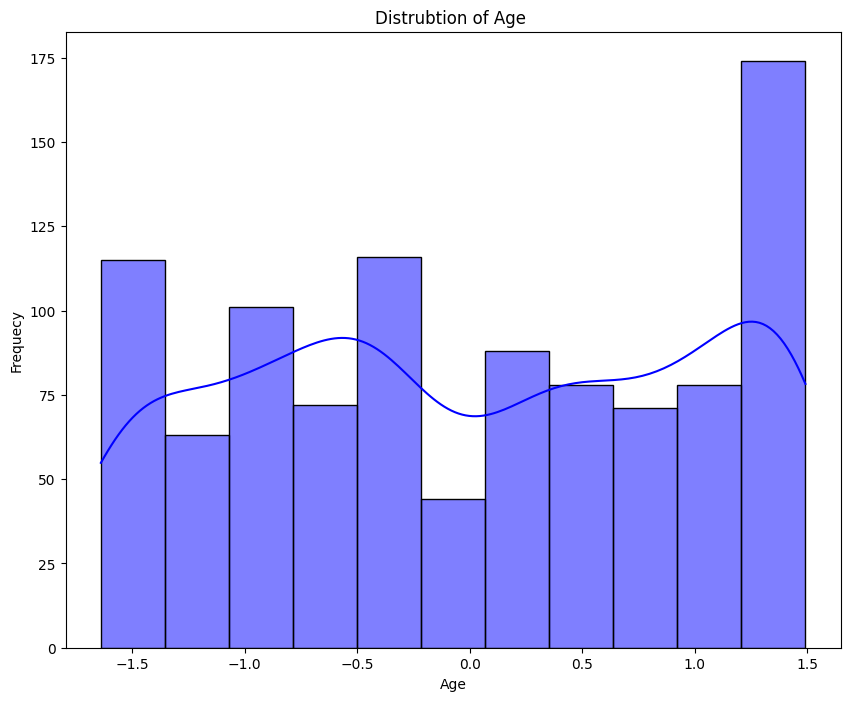

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data['Age'], color="Blue", kde=True)
plt.title("Distrubtion of Age ")
plt.xlabel("Age")
plt.ylabel("Frequecy")


Text(0, 0.5, 'Frequecy')

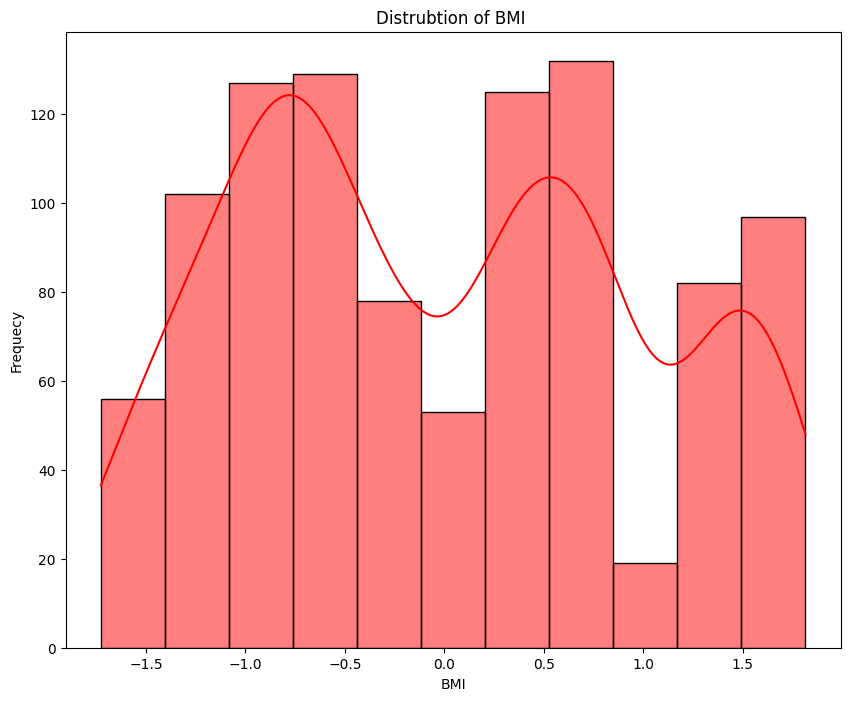

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data['BMI'], color="Red", kde=True)
plt.title("Distrubtion of BMI ")
plt.xlabel("BMI")
plt.ylabel("Frequecy")


Text(0, 0.5, 'target')

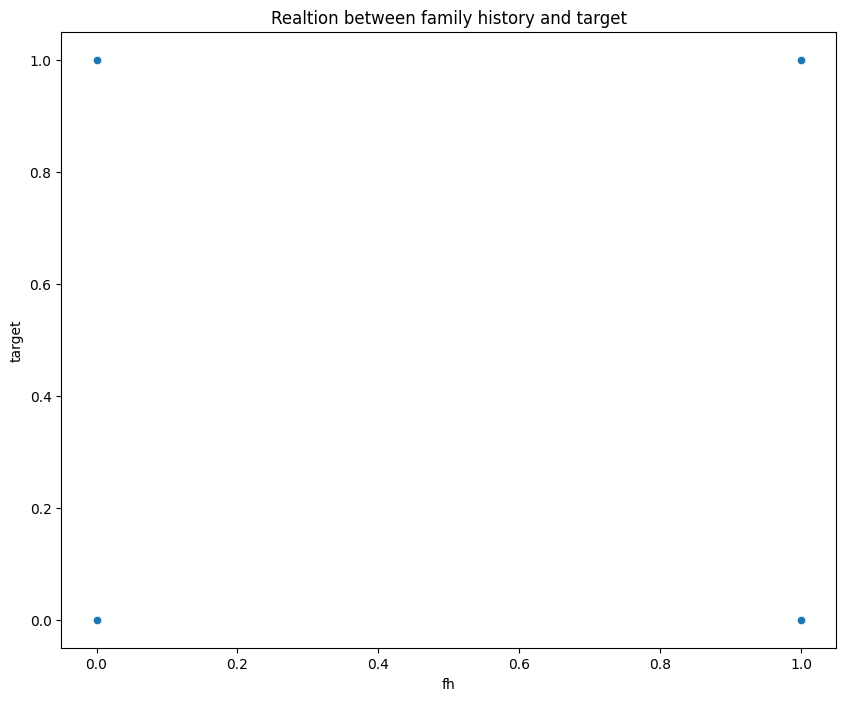

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Family History'], y=data['Diabetes Risk'])
plt.title("Realtion between family history and target")
plt.xlabel('fh')
plt.ylabel('target')

Text(0, 0.5, 'DR')

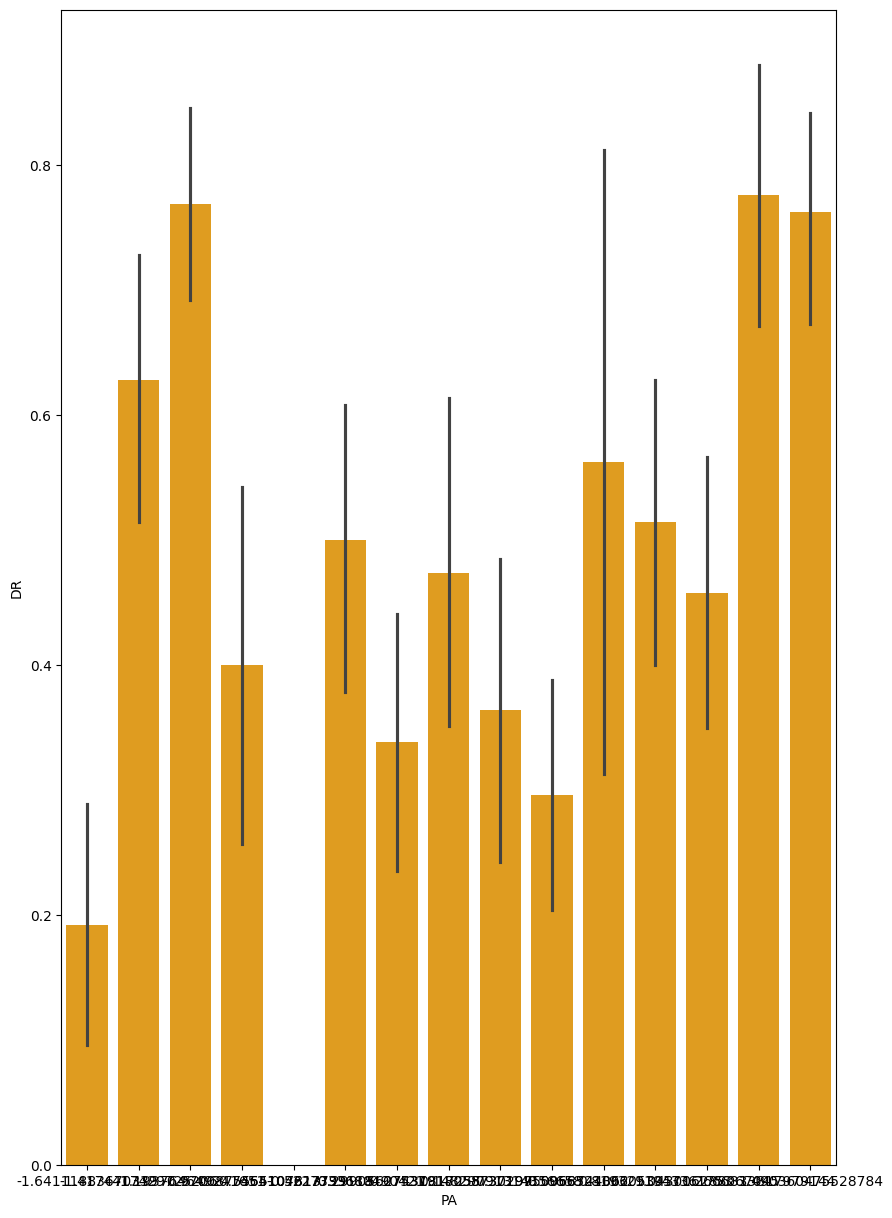

In [ ]:
plt.figure(figsize=(10, 15))
sns.barplot(x=data['Physical Activity (hours/week)'], y = data['Diabetes Risk'], color="orange")
plt.xlabel('PA')
plt.ylabel('DR')

In [15]:
x = data.drop('Thrives', axis=1)
y = data['Thrives']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
lo  = LogisticRegression()
lo.fit(x_train, y_train)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred_lo = lo.predict(x_test)
y_pred_dt = dt.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# for Lo
print("accuracy = ", accuracy_score(y_test, y_pred_lo))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lo))
print("classfication report:", classification_report(y_test, y_pred_lo))


accuracy =  0.695
Confusion matrix: [[64 33]
 [28 75]]
classfication report:               precision    recall  f1-score   support

           0       0.70      0.66      0.68        97
           1       0.69      0.73      0.71       103

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



In [21]:
# for dt
print("accuracy = ", accuracy_score(y_test, y_pred_dt))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dt))
print("classfication report:", classification_report(y_test, y_pred_dt))


accuracy =  0.985
Confusion matrix: [[ 94   3]
 [  0 103]]
classfication report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        97
           1       0.97      1.00      0.99       103

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



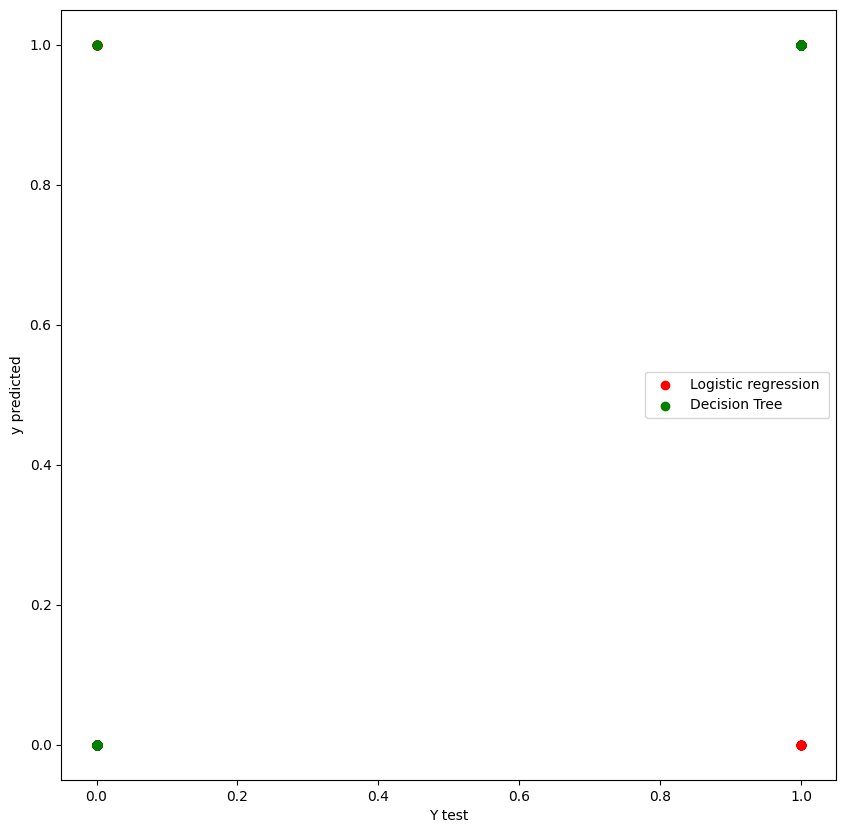

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(x = y_test, y = y_pred_lo, color="red", label="Logistic regression ")
plt.scatter(x = y_test, y = y_pred_dt, color="green", label="Decision Tree")
plt.xlabel("Y test")
plt.ylabel("y predicted")
plt.legend()


In [23]:
# using grid search cv for lo
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_param = {'max_iter': [30, 40, 50]}
grid_search_model = GridSearchCV(lo,grid_param, cv=5)
grid_search_model.fit(x_train, y_train)
print(grid_search_model.best_params_)
grid_search_model.best_score_


{'max_iter': 30}


0.61875

In [24]:
random_param = {'max_depth': [5,10, 20, 30, 40, 50]}
random_search_model = RandomizedSearchCV(dt,random_param, cv=5)
random_search_model.fit(x_train, y_train)
print(random_search_model.best_params_)
random_search_model.best_score_

{'max_depth': 20}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


1.0

In [25]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [27]:
import gradio as gr
def predict(st, sl,ws, t, ph, ps):
  try:
    input_data = pd.DataFrame(
        {
            "Soil Type": [st],
            "Sunlight (hours/day)": [sl],
            "Water Supply (liters/week)": [ws],
            "Temperature (Â°C)": [t],
            "pH Level": [ph],
            "Plant Species": [ps]
        })
    for col in encode_cols:
      input_data[col] = le[col].transform(input_data[col])

    input_data[scale_cols] = scaler.transform(input_data[scale_cols])

    prediction = dt.predict(input_data)
    if prediction[0] == 1:
      return "yes"
    else:
      return "No "
  except Exception as e:
    return str(e)

gr.Interface(
    fn = predict,
    inputs = [
        gr.Dropdown(choices=['Clay', 'Sandy', 'Loamy']),
        gr.Number(label="Sunlight (hours/day)"),
        gr.Number(label="Water Supply (liters/week)"),
        gr.Number("Temp"),
        gr.Number(label="pH Level"),
        gr.Dropdown(choices = ['Fern', 'Cactus', 'Rose', 'Lily', 'Oak'])
    ],
     outputs= gr.Textbox(label="Prediction")

).launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://beef322b97da643610.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [26]:
data.columns

Index(['Soil Type', 'Sunlight (hours/day)', 'Water Supply (liters/week)',
       'Temperature (Â°C)', 'pH Level', 'Plant Species', 'Thrives'],
      dtype='object')